In [3]:
from tdc.single_pred import ADME
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from noiseestimator import NoiseEstimator

In [4]:
data = pd.read_csv('../data/external/Casf2016/CoreSet.dat', delim_whitespace=True)
data

,#code,resl,year,logKa,Ka,target
0,4llx,1.75,2014,2.89,Ki=1300uM,1
1,5c28,1.56,2015,5.66,Ki=2.2uM,1
2,3uuo,2.11,2012,7.96,Ki=11nM,1
3,3ui7,2.28,2011,9.00,Ki=1nM,1
4,5c2h,2.09,2015,11.09,Ki=8.2pM,1
...,...,...,...,...,...,...
280,3dxg,1.39,2009,2.40,Ki=4.0mM,57
281,3d6q,1.60,2009,3.76,Ki=172uM,57
282,1w4o,1.60,2005,5.22,Ki=6uM,57
283,1o0h,1.20,2003,5.92,Ki=1.2uM,57


In [5]:
data.logKa.to_csv('../data/processed/casf2016.csv', index=False)

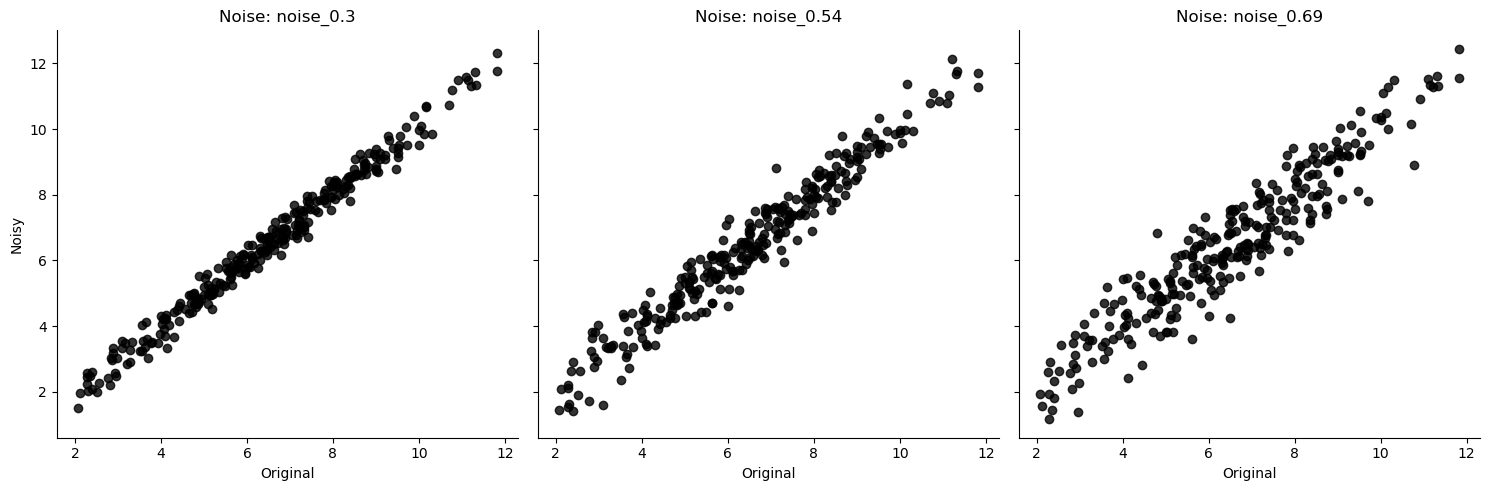

In [3]:
NE = NoiseEstimator(data.logKa, [0.3, 0.54, 0.69])
NE.plot()

<Axes: title={'center': 'pearsonr for different noise levels'}, xlabel='Noise level', ylabel='pearsonr'>

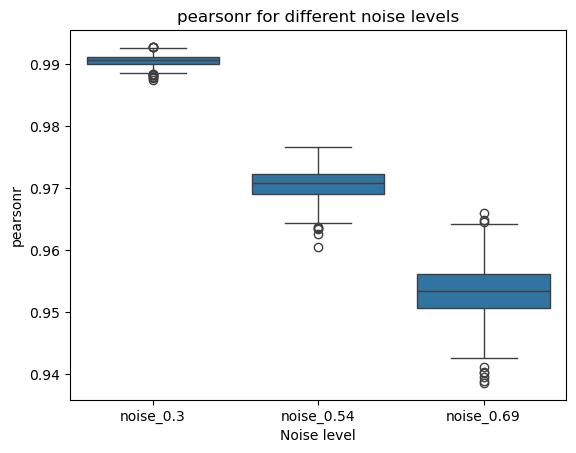

In [4]:
NE.plot_bootstrap(metric='pearsonr')

In [5]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.3,0.239354,0.089970,0.299682,0.980902,0.990656
noise_0.54,0.430601,0.291093,0.539073,0.938209,0.970648
noise_0.69,0.550350,0.475863,0.689192,0.898987,0.953334


<Axes: title={'center': 'pearsonr for different noise levels'}, xlabel='Noise level', ylabel='pearsonr'>

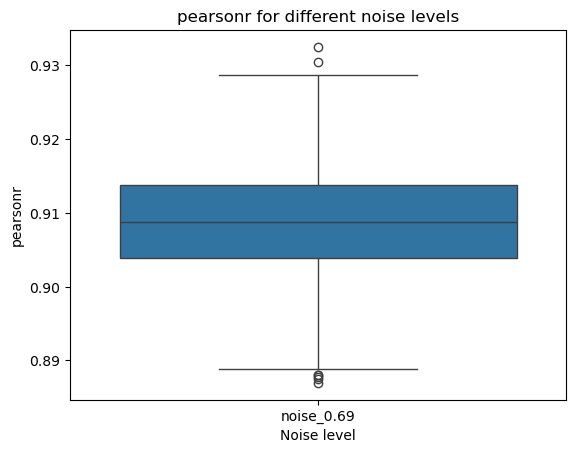

In [6]:
NE = NoiseEstimator(data.logKa, 0.69, 0.69)
NE.plot_bootstrap(metric='pearsonr')

In [7]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.69,0.778354,0.951601,0.974695,0.816472,0.908873


In [8]:
NE.noise_bootstraps.pearsonr.to_csv('../data/interim/Casf2016_R.csv', index=False)